In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Bar Charts - Demo 1

In [2]:
top = Table.read_table('top_movies.csv')

top.set_format([2, 3], NumberFormatter)

Title                            | Studio          | Gross       | Gross (Adjusted) | Year
Gone with the Wind               | MGM             | 198,676,459 | 1,796,176,700    | 1939
Star Wars                        | Fox             | 460,998,007 | 1,583,483,200    | 1977
The Sound of Music               | Fox             | 158,671,368 | 1,266,072,700    | 1965
E.T.: The Extra-Terrestrial      | Universal       | 435,110,554 | 1,261,085,000    | 1982
Titanic                          | Paramount       | 658,672,302 | 1,204,368,000    | 1997
The Ten Commandments             | Paramount       | 65,500,000  | 1,164,590,000    | 1956
Jaws                             | Universal       | 260,000,000 | 1,138,620,700    | 1975
Doctor Zhivago                   | MGM             | 111,721,910 | 1,103,564,200    | 1965
The Exorcist                     | Warner Brothers | 232,906,145 | 983,226,600      | 1973
Snow White and the Seven Dwarves | Disney          | 184,925,486 | 969,010,000      | 1937
... (190 rows omitted)

Use the `group` method to count how many times a categorical variable appears in a column

In [3]:
top.group('Studio').sort("count", descending=True)

Studio          | count
Buena Vista     | 35
Warner Brothers | 29
Paramount       | 25
Fox             | 24
Universal       | 23
Disney          | 11
Columbia        | 9
MGM             | 7
United Artists  | 6
Newline         | 5
... (13 rows omitted)

How many of the top movies did each studio produce?

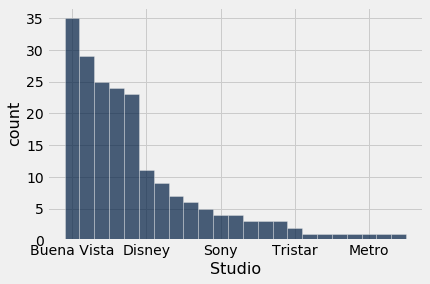

In [5]:
top.group('Studio').sort("count", descending=True).bar('Studio', 'count') #.barh first

How old are each of these movies?

In [7]:
aged = top.with_column("Age", 2020-top.column('Year'))
aged

Title                            | Studio          | Gross       | Gross (Adjusted) | Year | Age
Gone with the Wind               | MGM             | 198,676,459 | 1,796,176,700    | 1939 | 81
Star Wars                        | Fox             | 460,998,007 | 1,583,483,200    | 1977 | 43
The Sound of Music               | Fox             | 158,671,368 | 1,266,072,700    | 1965 | 55
E.T.: The Extra-Terrestrial      | Universal       | 435,110,554 | 1,261,085,000    | 1982 | 38
Titanic                          | Paramount       | 658,672,302 | 1,204,368,000    | 1997 | 23
The Ten Commandments             | Paramount       | 65,500,000  | 1,164,590,000    | 1956 | 64
Jaws                             | Universal       | 260,000,000 | 1,138,620,700    | 1975 | 45
Doctor Zhivago                   | MGM             | 111,721,910 | 1,103,564,200    | 1965 | 55
The Exorcist                     | Warner Brothers | 232,906,145 | 983,226,600      | 1973 | 47
Snow White and the Seven Dwarves | Disney          | 184,925,486 | 969,010,000      | 1937 | 83
... (190 rows omitted)

How many movies of each age are there?

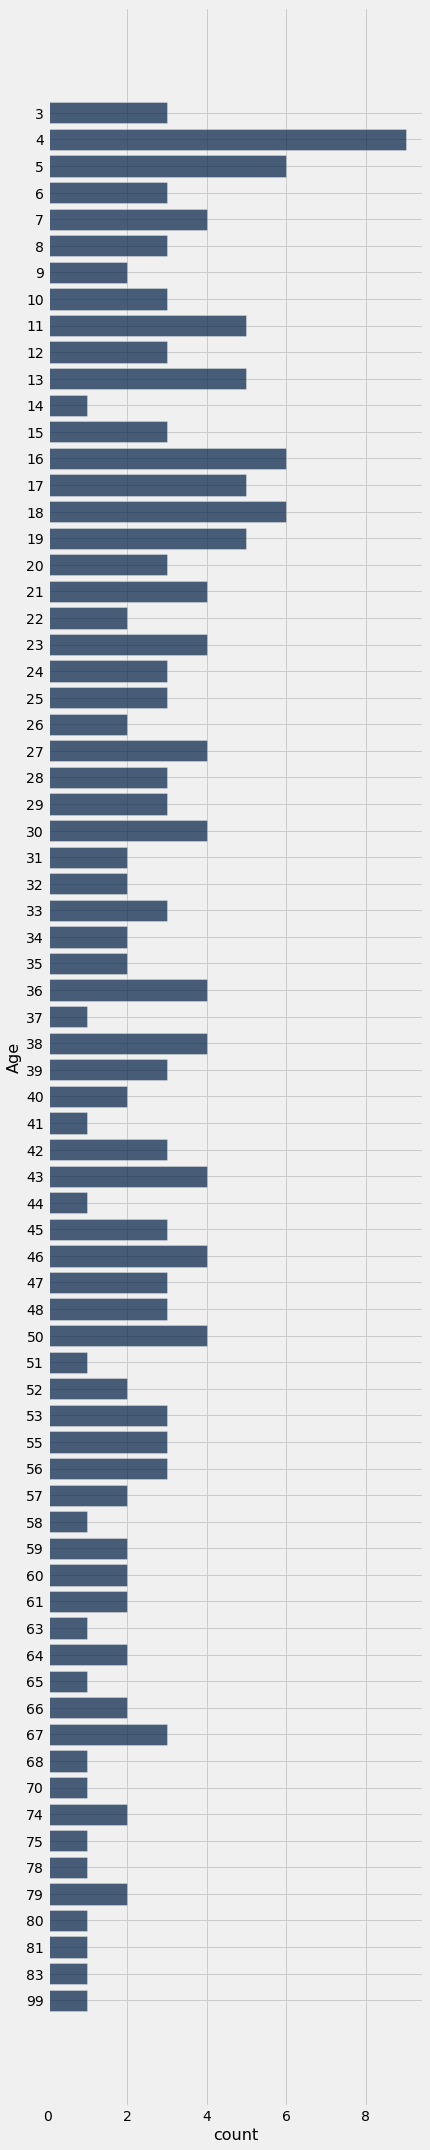

In [9]:
aged.group("Age").barh("Age")

## Binning - Demo2

The `bin` method groups numbers into 10 equally spaced bins

In [10]:
aged.bin('Age').show()

You can ask the `bin` method to use any bins you like

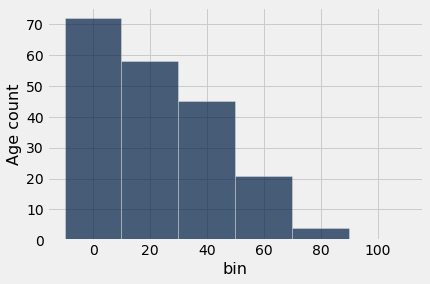

In [17]:
aged.bin('Age', bins=np.arange(0,101,20)).bar('bin')

How can I make the array `[0, 20, 40, 60, 80, 100]` with less typing?

In [18]:
years=np.arange(0,101,20)

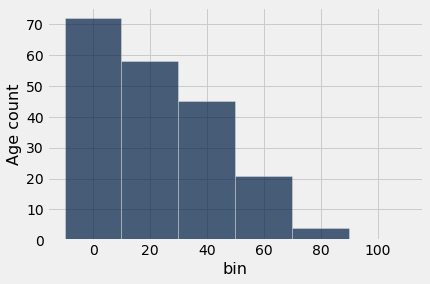

In [19]:
aged.bin('Age', bins=years).bar('bin')

## Histogram - Demo 3

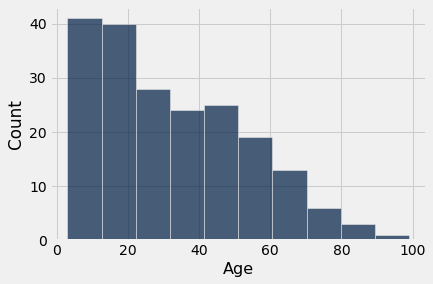

In [20]:
aged.hist('Age', normed=False)

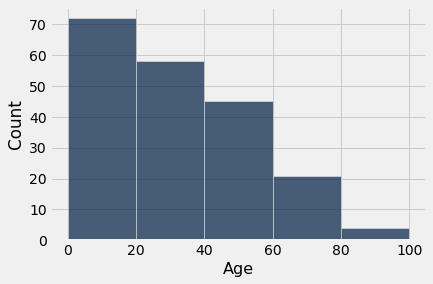

In [21]:
aged.hist('Age', bins=np.arange(0, 101, 20), normed=False)

What's going on in this picture?
* a) heights represent counts in each bin
* b) areas represent counts in each bin
* c) both heights and areas represent counts in each bin

# Uneven bins

There are lots of new movies, and few old movies, so let's change the bin sizes so we can see them better

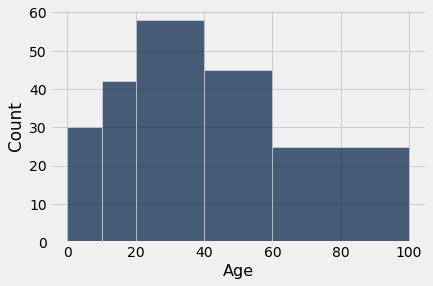

In [22]:
aged.hist('Age', bins=[0, 10, 20, 40, 60, 100], normed=False)

What's going on in this picture?
* a) heights represent counts in each bin
* b) areas represent counts in each bin
* c) both heights and areas represent counts in each bin

## Density - Demo 4

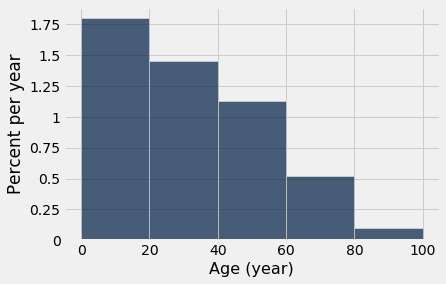

In [23]:
aged.hist('Age', bins=np.arange(0, 101, 20), unit='year')

What's going on in this picture?
* a) heights represent counts in each bin
* b) areas represent counts in each bin
* c) both heights and areas represent counts in each bin

In [ ]:
aged.hist('Age', bins=np.arange(0, 101, 5), unit='year')

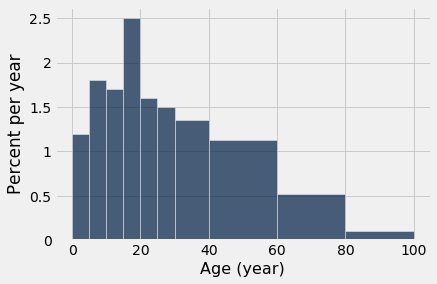

In [25]:
aged.hist('Age', bins=[0, 5, 10, 15, 20, 25, 30, 40, 60, 80, 100], unit='year')

What's going on in this picture?
* a) heights represent counts in each bin
* b) areas represent counts in each bin
* c) both heights and areas represent counts in each bin

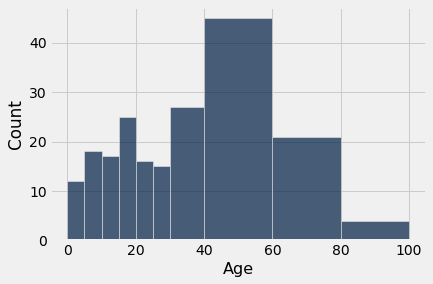

In [24]:
aged.hist('Age', bins=[0, 5, 10, 15, 20, 25, 30, 40, 60, 80, 100], normed=False) 

### Discussion question

In [ ]:
actress = Table.read_table('actress.csv')
actress.hist(1, bins=[0,15,35,85])

What's the height of each bar in these 
two histograms?
```
actress.hist(1, bins=[0,15,25,85])
actress.hist(1, bins=[0,15,35,85])
```

In [ ]:
actress.hist(1, bins=[0,15,25,85], unit='million $')

In [ ]:
actress.hist(1, bins=[0,15,35,85], unit='million $')

## Overlaid Graphs - 6

In [ ]:
heights = Table.read_table('galton.csv')


heights

In [ ]:
heights.hist('daughter', unit='inch')

In [ ]:
heights.hist('mother', unit='inch')

In [ ]:
heights.hist('daughter', 'mother', unit='inch')
_ = plots.xlabel('Height (inches)')

In [ ]:
heights.hist(unit='inch')
_ = plots.xlabel('Height (inches)')

In [ ]:
heights.hist(bins=np.arange(55, 81, 1), unit='inch')
_ = plots.xlabel('Height (inches)')

In [ ]:
heights.scatter('mother', 'daughter')

In [ ]:
heights.scatter('daughter')